In [1]:
#import packages
import pandas as pd
import numpy as np
from sklearn import datasets

#import dataset
df = pd.read_csv('medical_clean.csv',encoding='latin-1')

df

df.describe() 


,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [3]:
#create limited data frame for PCA
df = df[['Population', 'Age', 'Income', 'Doc_visits', 'Full_meals_eaten', 'Initial_days', 'TotalCharge', 'Additional_charges']]

#import more packages
from sklearn.preprocessing import scale
from sklearn import decomposition 

#scale data 
X = scale(df)


In [4]:
#import libraries
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

#identify variables for PCA
test_pca=X

#normalize data
test_pca_normalized=(test_pca-test_pca.mean())/test_pca.std()

#determine primary components
pca= PCA(n_components=test_pca.shape[1])
pca.fit(test_pca_normalized)



PCA(n_components=8)

In [6]:
#transform variables into principle components
test_pca2= pd.DataFrame(pca.transform(test_pca_normalized),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])



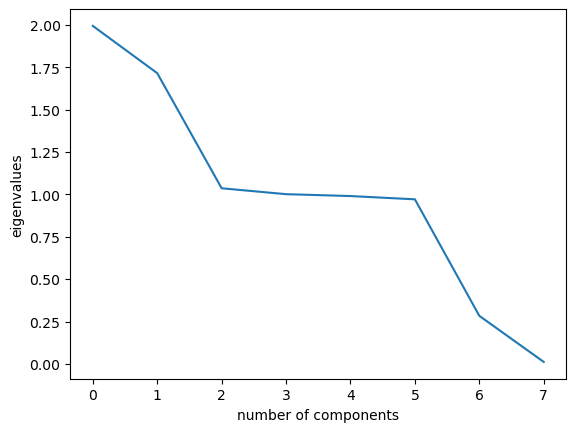

In [8]:
#plot eigen values
cov_matrix= np.dot(test_pca_normalized.T, test_pca_normalized) / test_pca.shape[0]

eigenvalues= [np.dot(eigenvector.T , np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.show()



In [9]:
#get explained variance ratio 
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.24914426, 0.21432213, 0.12946056, 0.12512021, 0.12373834,
       0.12131743, 0.03543241, 0.00146465])